# Práctica 4: Entrenamiento de redes neuronales:

Mario Quiñones Pérez y Guillermo García Patiño Lenza

In [1]:
from scipy.io import loadmat 
from displayData import displayData
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Función de coste:

In [2]:
def y_to_one_hot(num_etiquetas):
    l = []
    for i in range(num_etiquetas):
        p = []
        for j in range(num_etiquetas):
            if( i == j):
                p.append(1)
            else:
                p.append(0)
        l.append(p)
    return l

In [3]:
def cargaDatos(file = 'ex4data1.mat'):
    data = loadmat(file)
    X = data['X']
    y = data['y']
    return (X,y)

(<Figure size 432x288 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227D500E6D0>,
       dtype=object))

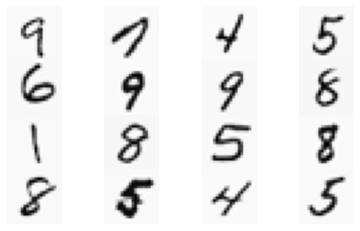

In [4]:
(X,y) = cargaDatos('ex4data1.mat')
l = np.array([X[i] for i in np.random.randint(5000, size = 20)])
displayData(l)

In [5]:
def cargaPesos(file = 'ex4weights.mat'):
    weights = loadmat(file)
    Theta1,Theta2 = weights['Theta1'] , weights['Theta2']
    print(Theta1.shape)
    print(Theta2.shape)
    return Theta1,Theta2

In [32]:
T1,T2 = cargaPesos()

(25, 401)
(10, 26)


In [6]:
def pasa_a_onehot(y, y_onehot):
    res = [y_onehot[i[0]-1] for i in y]
    return res

In [77]:
(X,y) = cargaDatos('ex4data1.mat')
print(y)
r = y_to_one_hot(10)
s = np.array(pasa_a_onehot(y, r))
print(s.shape)
for i in np.random.randint(5000,size = 10):
    print("{} = {}".format(s[i],y[i]))

[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]
(5000, 10)
[0 0 0 0 0 0 1 0 0 0] = [7]
[0 0 1 0 0 0 0 0 0 0] = [3]
[0 0 0 0 1 0 0 0 0 0] = [5]
[0 0 0 0 0 0 0 1 0 0] = [8]
[0 0 0 1 0 0 0 0 0 0] = [4]
[0 0 1 0 0 0 0 0 0 0] = [3]
[0 0 0 0 0 0 1 0 0 0] = [7]
[0 0 0 0 0 1 0 0 0 0] = [6]
[0 0 0 1 0 0 0 0 0 0] = [4]
[0 0 0 0 1 0 0 0 0 0] = [5]


In [7]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

In [8]:
def prop_delante(X,Theta1,Theta2):
    m = X.shape[0]
    
    A1 = np.hstack([np.ones([m,1]),X])
    Z2 = np.dot(A1,Theta1.T)
    A2 = np.hstack([np.ones([m,1]), sigmoide(Z2)])
    Z3 = np.dot(A2, Theta2.T)
    H = sigmoide(Z3)
    
    return A1,A2,H

In [79]:
def prop_delante2(X,Theta):
    m = X.shape[0]
    A = []
    Z = []
    a = np.hstack([np.ones([m,1]), X])
    z = np.dot(a,Theta[0].T)
    A.append(a)
    Z.append(z)
    for i in range(1,Theta.shape[0],1):
        a = np.hstack([np.ones([m,1]), sigmoide(Z[-1])])
        A.append(a)
        z = np.dot(A[-1],Theta[i].T)
        Z.append(z)
    H = sigmoide(Z[-1])
    
    return A,Z,H

In [80]:
def prueba_prop_delante():
    T1, T2 = cargaPesos()
    T = np.array([T1,T2])
    X, y = cargaDatos()
    A,Z,H = prop_delante2(X,T)
    print("Dimensiones de H = {}".format(H.shape))
    print(H)

In [81]:
prueba_prop_delante()

(25, 401)
(10, 26)
Dimensiones de H = (5000, 10)
[[1.12661530e-04 1.74127856e-03 2.52696959e-03 ... 4.01468105e-04
  6.48072305e-03 9.95734012e-01]
 [4.79026796e-04 2.41495958e-03 3.44755685e-03 ... 2.39107046e-03
  1.97025086e-03 9.95696931e-01]
 [8.85702310e-05 3.24266731e-03 2.55419797e-02 ... 6.22892325e-02
  5.49803551e-03 9.28008397e-01]
 ...
 [5.17641791e-02 3.81715020e-03 2.96297510e-02 ... 2.15667361e-03
  6.49826950e-01 2.42384687e-05]
 [8.30631310e-04 6.22003774e-04 3.14518512e-04 ... 1.19366192e-02
  9.71410499e-01 2.06173648e-04]
 [4.81465717e-05 4.58821829e-04 2.15146201e-05 ... 5.73434571e-03
  6.96288990e-01 8.18576980e-02]]


In [88]:
def coste_redNeuronal(X,y,Theta1,Theta2):
    m_inv = (1/X.shape[0])
    m = X.shape[0]
    c = 0
    Theta = np.array([Theta1,Theta2])
    A, Z, H = prop_delante2(X,Theta)
    
    maux = -1 * y
    m1 = maux * np.log(H)
    m2 = ((1 - y) * np.log(1 - H))
    m3 = m1 - m2
    
    c = m_inv * sum(sum(m3))
    
    return c

In [89]:
def prueba_coste():
    (X,y) = cargaDatos()
    T1, T2 = cargaPesos()
    y = np.array(pasa_a_onehot(y, y_to_one_hot(10)))
    c = coste_redNeuronal(X,y,T1,T2)
    print(c)

In [90]:
prueba_coste()

(25, 401)
(10, 26)
0.2876291651613188


In [91]:
def coste_redNeuronalReg(X,y,Theta1,Theta2,reg):
    c = coste_redNeuronal(X,y,Theta1,Theta2)
    r = reg / (2 * X.shape[0])
    m1 = Theta1[1:][1:]
    m2 = Theta2[1:][1:]
    m1 = m1 ** 2
    m2 = m2 ** 2
    print("M1 es {}".format(m1.shape))
    t = 0
    t += sum(sum(m1)) + sum(sum(m2))
    c += r*t
    return c

In [92]:
def prueba_coste2():
    (X,y) = cargaDatos()
    T1, T2 = cargaPesos()
    y = np.array(pasa_a_onehot(y, y_to_one_hot(10)))
    c = coste_redNeuronalReg(X,y,T1,T2,1)
    print(c)

In [93]:
prueba_coste2()

(25, 401)
(10, 26)
M1 es (23, 401)
0.37079588338364705


## Cálculo del Gradiente

In [160]:
# params_rn = array unidimensional de parámetros de la red neuronal
def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y):
    Theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas +1)], (num_ocultas, (num_entradas + 1)))
    Theta2 = np.reshape(params_rn[num_ocultas * (num_entradas +1):], (num_etiquetas, (num_ocultas + 1)))
    
    Theta = np.array([Theta1, Theta2])
    A2, Z, H = prop_delante2(X,Theta)
    A = []
    A.append(X)
    for i in range(len(A2)):
        A.append(A2[i])
    
    Delta1 = np.zeros(np.shape(Theta1))
    Delta2 = np.zeros(np.shape(Theta2))
    m = X.shape[0]
    
    d3 = H - y

    print(len(A2))
    print(len(A))
    
    print(A[2])
    g = A[2] * (1 - A[2])
    print(g)
    d2 = np.dot(Theta2.T, d3) 
    d2 = d2 * g
    
    Delta1 = Delta1 + np.dot(d2 , A[1])
    Delta2 = Delta2 + np.dot(d3 , A[2])
        
    coste = coste_redNeuronal(X, y, Theta1, Theta2)
    
    return coste, Delta1, Delta2

In [161]:
def backprop_reg(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    c, D1, D2 = backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y)
    
    m = X.shape[0]
    Theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas +1)], (num_ocultas, (num_entradas + 1)))
    Theta2 = np.reshape(params_rn[num_ocultas * (num_entradas +1):], (num_etiquetas, (num_ocultas + 1)))
    c = coste_redNeuronalReg(X,y,Theta1,Theta2,reg)
    D1 = D1 + (reg/m)*Theta1
    D2 = D2 + (reg/m)*Theta2
    
    return c,D1,D2

## Comprobación del Gradiente

In [162]:
from checkNNGradients import checkNNGradients

In [163]:
checkNNGradients(backprop_reg, 0.1)

2
3
[[1.         0.70960522 0.40262816 0.40667976 0.70853912 0.61709689]
 [1.         0.33076357 0.21237576 0.91820074 0.13580835 0.22609695]
 [1.         0.62290443 0.49438991 0.38401117 0.65480077 0.69279999]
 [1.         0.42824628 0.16016981 0.92093646 0.17471004 0.17864193]
 [1.         0.51757795 0.57227639 0.38913474 0.57404579 0.74298165]]
[[0.         0.20606565 0.24051873 0.24129133 0.20651143 0.23628832]
 [0.         0.22135903 0.1672723  0.07510814 0.11736444 0.17497712]
 [0.         0.2348945  0.24996853 0.23654659 0.22603672 0.21282816]
 [0.         0.2448514  0.13451544 0.07281249 0.14418644 0.14672899]
 [0.         0.24969102 0.24477612 0.23770889 0.24451722 0.19095992]]


ValueError: shapes (6,3) and (5,3) not aligned: 3 (dim 1) != 5 (dim 0)